<a href="https://colab.research.google.com/github/asadacce/ML-based-QSAR-against-GTPase-KRAS/blob/main/GTPase_Morgan_FP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install chembl_webresource_client

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 55 kB 2.0 MB/s 
     |████████████████████████████████| 60 kB 6.4 MB/s 
  Attempting uninstall: itsdangerous
    Found existing installation: itsdangerous 1.1.0
    Uninstalling itsdangerous-1.1.0:
      Successfully uninstalled itsdangerous-1.1.0
  Attempting uninstall: attrs
    Found existing installation: attrs 22.1.0
    Uninstalling attrs-22.1.0:
      Successfully uninstalled attrs-22.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires itsdangerous<2.0,>=0.24, but you have itsdangerous 2.1.2 which is incompatible.


In [ ]:
import pandas as pd
from chembl_webresource_client.new_client import new_client

In [ ]:
target = new_client.target
target_query = target.search('GTPase KRas')
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Homo sapiens,GTPase KRas,35.0,False,CHEMBL2189121,"[{'accession': 'P01116', 'component_descriptio...",SINGLE PROTEIN,9606
1,[],Homo sapiens,RAS,32.0,False,CHEMBL4524006,"[{'accession': 'P01112', 'component_descriptio...",PROTEIN FAMILY,9606
2,[],Homo sapiens,PDE6D/KRAS,30.0,False,CHEMBL4523623,"[{'accession': 'O43924', 'component_descriptio...",PROTEIN-PROTEIN INTERACTION,9606
3,[],Rattus norvegicus,ADP-ribosylation factor GTPase-activating prot...,15.0,False,CHEMBL2146307,"[{'accession': 'Q62848', 'component_descriptio...",SINGLE PROTEIN,10116
4,"[{'xref_id': 'P01112', 'xref_name': None, 'xre...",Homo sapiens,Transforming protein p21/H-Ras-1,14.0,False,CHEMBL2167,"[{'accession': 'P01112', 'component_descriptio...",SINGLE PROTEIN,9606
5,[],Homo sapiens,GTPase NRas,14.0,False,CHEMBL2079845,"[{'accession': 'P01111', 'component_descriptio...",SINGLE PROTEIN,9606
6,[],Rattus norvegicus,Ras GTPase-activating protein SynGAP,14.0,False,CHEMBL2176804,"[{'accession': 'Q9QUH6', 'component_descriptio...",SINGLE PROTEIN,10116
7,[],Homo sapiens,Ras GTPase-activating-like protein IQGAP1,13.0,False,CHEMBL4295763,"[{'accession': 'P46940', 'component_descriptio...",SINGLE PROTEIN,9606
8,[],Homo sapiens,Mitofusin-2,13.0,False,CHEMBL4630807,"[{'accession': 'O95140', 'component_descriptio...",SINGLE PROTEIN,9606
9,"[{'xref_id': 'P52757', 'xref_name': None, 'xre...",Homo sapiens,Rho-GTPase-activating protein 3,12.0,False,CHEMBL4504,"[{'accession': 'P52757', 'component_descriptio...",SINGLE PROTEIN,9606


In [ ]:
selected_target = targets.target_chembl_id[0]
selected_target

'CHEMBL2189121'

In [ ]:
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")
df = pd.DataFrame.from_dict(res)


In [ ]:
selection = ['molecule_chembl_id','canonical_smiles','standard_value']
df3 = df[selection]


In [ ]:
df3['standard_value'] = pd.to_numeric(df3['standard_value'],errors = 'coerce')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
        
    return x

In [ ]:
df3.standard_value.describe()

count       455.000000
mean       6126.972178
std       25173.390052
min           0.100000
25%          31.000000
50%         254.000000
75%        2000.000000
max      342000.000000
Name: standard_value, dtype: float64

In [ ]:
-np.log10( (10**-9)* 100000000 )

1.0

In [ ]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [ ]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
        
    return x

In [ ]:
df_norm = norm_value(df3)
df_norm

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  # Remove the CWD from sys.path while we load stuff.


,molecule_chembl_id,canonical_smiles,standard_value_norm
0,CHEMBL2396992,Cc1[nH]c2cc(Cl)cc(Cl)c2c1CCN,155000.0
1,CHEMBL2396992,Cc1[nH]c2cc(Cl)cc(Cl)c2c1CCN,342000.0
2,CHEMBL3218635,CC(C)[C@@H]1NC(=O)[C@@H](CC(N)=O)NC(=O)[C@H](C...,1200.0
3,CHEMBL3218636,CCCC[C@H]1NC(=O)[C@@H](Cc2ccc3ccccc3c2)NC(=O)[...,10000.0
4,CHEMBL3218637,CC1(C)COC(=O)[C@H](Cc2ccccc2)NC(=O)[C@H](CCCNC...,1800.0
...,...,...,...
464,CHEMBL4858364,C#Cc1c(F)ccc2cc(O)cc(-c3ncc4c(N5CC6CCC(C5)N6)n...,0.4
465,CHEMBL4863371,CCc1c(F)ccc2cc(O)cc(-c3ncc4c(N5CC6CCC(C5)N6)nc...,0.8
466,CHEMBL4855757,Oc1cc(-c2ncc3c(N4CC5CCC(C4)N5)nc(OCC45CCCN4C(C...,0.1
467,CHEMBL4876243,COC1CN2CCCC2(COc2nc(N3CC4CCC(C3)N4)c3cnc(-c4cc...,0.6


In [ ]:
df_final = pIC50(df_norm)
df_final

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  # This is added back by InteractiveShellApp.init_path()


,molecule_chembl_id,canonical_smiles,pIC50
0,CHEMBL2396992,Cc1[nH]c2cc(Cl)cc(Cl)c2c1CCN,3.809668
1,CHEMBL2396992,Cc1[nH]c2cc(Cl)cc(Cl)c2c1CCN,3.465974
2,CHEMBL3218635,CC(C)[C@@H]1NC(=O)[C@@H](CC(N)=O)NC(=O)[C@H](C...,5.920819
3,CHEMBL3218636,CCCC[C@H]1NC(=O)[C@@H](Cc2ccc3ccccc3c2)NC(=O)[...,5.000000
4,CHEMBL3218637,CC1(C)COC(=O)[C@H](Cc2ccccc2)NC(=O)[C@H](CCCNC...,5.744727
...,...,...,...
464,CHEMBL4858364,C#Cc1c(F)ccc2cc(O)cc(-c3ncc4c(N5CC6CCC(C5)N6)n...,9.397940
465,CHEMBL4863371,CCc1c(F)ccc2cc(O)cc(-c3ncc4c(N5CC6CCC(C5)N6)nc...,9.096910
466,CHEMBL4855757,Oc1cc(-c2ncc3c(N4CC5CCC(C4)N5)nc(OCC45CCCN4C(C...,10.000000
467,CHEMBL4876243,COC1CN2CCCC2(COc2nc(N3CC4CCC(C3)N4)c3cnc(-c4cc...,9.221849


In [ ]:
# Install RDKit.
%%capture
!pip install rdkit-pypi

In [ ]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
import numpy as np

In [ ]:
canonical_smiles = df_final.iloc[:,1]

# Morgan finger print

In [ ]:
bi = {}
ms = [Chem.MolFromSmiles(s) for s in canonical_smiles]
fps = [AllChem.GetMorganFingerprintAsBitVect(j, 2, bitInfo=bi, nBits=1024) for j in ms]
fps_Morgan = []
for fp in fps:
    fps_Morgan.append([m for m in fp])
fps_Morgan = np.asmatrix(fps_Morgan)
fps_Morgan

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 1, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
morgan = pd.DataFrame(fps_Morgan)
morgan

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
465,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
466,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
467,0,0,0,1,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
df3_Y = df_norm['pIC50']
df3_Y

0       3.809668
1       3.465974
2       5.920819
3       5.000000
4       5.744727
         ...    
464     9.397940
465     9.096910
466    10.000000
467     9.221849
468     7.696804
Name: pIC50, Length: 469, dtype: float64

In [ ]:
df4 = pd.concat([morgan,df3_Y], axis=1)
df4

,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,pIC50
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.809668
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.465974
2,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,5.920819
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,5.000000
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,5.744727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,9.397940
465,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,9.096910
466,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,10.000000
467,0,0,0,1,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,9.221849


In [ ]:
df4 = df4.dropna(how='any')
df4

,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,pIC50
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.809668
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.465974
2,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,5.920819
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,5.000000
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,5.744727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,9.397940
465,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,9.096910
466,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,10.000000
467,0,0,0,1,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,9.221849


In [ ]:
X = df4.drop('pIC50', axis=1)

In [ ]:
Y = df4.pIC50
Y.shape

(455,)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape, Y_train.shape

((364, 1024), (91, 1024), (364,))

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, Y_train)

RandomForestRegressor()

In [ ]:
Y_train_pred = model.predict(X)
Y_test_pred = model.predict(X_test)
Y_train_pred.shape

(455,)

In [ ]:
#train_r2
score = model.score(X_train, Y_train)
score

0.886001524045716

In [ ]:
#train_mse
from sklearn.metrics import mean_squared_error
mean_squared_error(Y, Y_train_pred)

0.27382396504694195

In [ ]:
#test_q2/external
from sklearn.metrics import r2_score
r2_score(Y_test, Y_test_pred)

0.6212538091234924

In [ ]:
#test_mse/external
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test, Y_test_pred)

0.585781390184942

In [ ]:
#10_fold_CV
import statistics
from sklearn.model_selection import cross_validate
scores = cross_validate(model, X, Y, cv=10,
                     scoring=('r2', 'neg_mean_squared_error'),
                     return_train_score=True)
B=(scores['train_neg_mean_squared_error'])
B1 = statistics.mean(B)
print(B1)

C=(scores['train_r2'])
C1 = statistics.mean(C)
print(C1)

-0.20921292979951017
0.8752311088219592


In [ ]:
#y_scrambiling
import statistics
r2_train_list = []
for i in range(100):
  Y_train1 = Y_train.sample(frac=1, replace=False, random_state=i)
  model = RandomForestRegressor()
  model.fit(X_train, Y_train1)
  Y_train_pred = model.predict(X_train)
  r2b = r2_score(Y_train1, Y_train_pred)
  r2_train_list.append(r2b)

A=(r2_train_list[:100])
A1 = statistics.mean(A)
print(A1)

0.5856345164535377


Text(0.5, 0, 'pIC50')

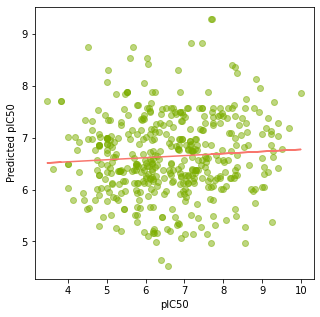

In [ ]:
# Plot of predicted vs actual
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,5))
plt.scatter(x=Y, y=Y_train_pred, c="#7CAE00", alpha=0.5)

z = np.polyfit(Y, Y_train_pred, 1)
p = np.poly1d(z)

plt.plot(Y,p(Y),"#F8766D")
plt.ylabel('Predicted pIC50')
plt.xlabel('pIC50')

In [ ]:
from rdkit.Chem.PandasTools import LoadSDF
df_t = LoadSDF('Taiwan_database.sdf', smilesName='SMILES')
df_t

,PUBCHEM_COMPOUND_CID,PUBCHEM_CONFORMER_RMSD,PUBCHEM_CONFORMER_DIVERSEORDER,PUBCHEM_MMFF94_PARTIAL_CHARGES,PUBCHEM_EFFECTIVE_ROTOR_COUNT,PUBCHEM_PHARMACOPHORE_FEATURES,PUBCHEM_HEAVY_ATOM_COUNT,PUBCHEM_ATOM_DEF_STEREO_COUNT,PUBCHEM_ATOM_UDEF_STEREO_COUNT,PUBCHEM_BOND_DEF_STEREO_COUNT,...,PUBCHEM_IUPAC_OPENEYE_NAME,PUBCHEM_IUPAC_SYSTEMATIC_NAME,PUBCHEM_IUPAC_TRADITIONAL_NAME,PUBCHEM_MOLECULAR_FORMULA,PUBCHEM_MOLECULAR_WEIGHT,PUBCHEM_MONOISOTOPIC_WEIGHT,PUBCHEM_OPENEYE_CAN_SMILES,PUBCHEM_OPENEYE_ISO_SMILES,PUBCHEM_TOTAL_CHARGE,PUBCHEM_XLOGP3_AA
0,5321163,0.600000,1\n2\n4\n3,20\n1 -0.23\n10 -0.15\n11 -0.18\n12 -0.15\n13 ...,3,6\n1 2 acceptor\n1 3 acceptor\n1 4 acceptor\n1...,17,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5319385,1,1\n319\n218\n442\n112\n564\n36\n972\n732\n358\...,33\n1 -0.43\n10 -0.29\n11 0.14\n12 -0.28\n13 0...,8,7\n1 11 hydrophobe\n1 2 acceptor\n1 4 acceptor...,26,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5317135,1,1\n23\n7\n190\n223\n40\n85\n264\n120\n217\n226...,31\n1 -0.3\n10 0.09\n11 0.14\n12 -0.28\n13 0.1...,7.600000,8\n1 1 acceptor\n1 13 hydrophobe\n1 2 acceptor...,25,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5321166,1,1\n128\n166\n59\n7\n178\n189\n80\n107\n62\n284...,32\n1 -0.68\n10 -0.28\n11 -0.29\n12 0.14\n13 0...,8,8\n1 1 acceptor\n1 1 donor\n1 12 hydrophobe\n1...,25,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5321165,1,6\n8\n54\n42\n481\n545\n123\n528\n538\n25\n106...,31\n1 -0.68\n12 -0.29\n13 -0.29\n14 0.08\n15 0...,7,9\n1 1 acceptor\n1 1 donor\n1 19 hydrophobe\n1...,25,0,0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5279,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5280,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5281,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5282,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
selection = ['PUBCHEM_COMPOUND_CID','SMILES']


In [ ]:
df_t2 = df_t[selection]
df_t2
df_t2.to_csv('df_t2.csv')

In [ ]:
SMILES = df_t2.iloc[:,1]

In [ ]:
bi = {}
ms = [Chem.MolFromSmiles(s) for s in SMILES]
fps = [AllChem.GetMorganFingerprintAsBitVect(j, 2, bitInfo=bi, nBits=1024) for j in ms]
fps_Morgan = []
for fp in fps:
    fps_Morgan.append([m for m in fp])
fps_Morgan = np.asmatrix(fps_Morgan)
fps_Morgan

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 1, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
morgan_t = pd.DataFrame(fps_Morgan)
morgan_t

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5265,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5266,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5267,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,1,0,0,0,0
5268,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,1,0,0,0,0


In [ ]:
T_pred = model.predict(morgan_t)

In [ ]:
T_pred=pd.DataFrame(T_pred)
T_pred

,0
0,5.260016
1,5.507682
2,5.460494
3,5.466729
4,5.773457
...,...
5265,5.336517
5266,5.102922
5267,6.615080
5268,6.636968


In [ ]:
T_pred.to_csv('Taiwan_Final_predicted1.csv')

# SVR

In [ ]:
import numpy as np
from sklearn.svm import SVR
model2=SVR()
model2.fit(X_train, Y_train)

SVR()

In [ ]:
Y_train_pred2 = model2.predict(X)
Y_test_pred2 = model2.predict(X_test)

In [ ]:
#train_r2
score = model2.score(X_train, Y_train)
score

0.7589805140947669

In [ ]:
#train_mse
from sklearn.metrics import mean_squared_error
mean_squared_error(Y, Y_train_pred2)

0.4559192924529093

In [ ]:
#test_q2/external
from sklearn.metrics import r2_score
r2_score(Y_test, Y_test_pred2)

0.5969079581371493

In [ ]:
#test_mse/external
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test, Y_test_pred2)

0.6234354888387434

In [ ]:
#10_fold_CV
import statistics
from sklearn.model_selection import cross_validate
scores = cross_validate(model2, X, Y, cv=10,
                     scoring=('r2', 'neg_mean_squared_error'),
                     return_train_score=True)
B=(scores['train_neg_mean_squared_error'])
B1 = statistics.mean(B)
print(B1)

C=(scores['train_r2'])
C1 = statistics.mean(C)
print(C1)

-0.39132884024179804
0.7666000770161662


In [ ]:
#y_scrambiling
import statistics
r2_train_list = []
for i in range(100):
  Y_train1 = Y_train.sample(frac=1, replace=False, random_state=i)
  model = SVR()
  model.fit(X_train, Y_train1)
  Y_train_pred = model.predict(X_train)
  r2b = r2_score(Y_train1, Y_train_pred)
  r2_train_list.append(r2b)

A=(r2_train_list[:100])
A1 = statistics.mean(A)
print(A1)

0.22798072474798367


Text(0.5, 0, 'pIC50')

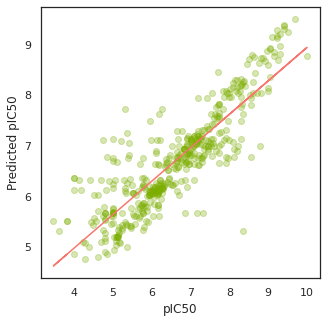

In [ ]:
# Plot of predicted vs actual
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,5))
plt.scatter(x=Y, y=Y_train_pred2, c="#7CAE00", alpha=0.3)

# Add trendline
# https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs
z = np.polyfit(Y, Y_train_pred2, 1)
p = np.poly1d(z)

plt.plot(Y,p(Y),"#F8766D")
plt.ylabel('Predicted pIC50')
plt.xlabel('pIC50')

# DecisionTreeRegressor

In [ ]:
import numpy as np
from sklearn import tree
model3 = tree.DecisionTreeRegressor()
model3.fit(X_train, Y_train)

DecisionTreeRegressor()

In [ ]:
Y_train_pred3 = model3.predict(X)
Y_test_pred3 = model3.predict(X_test)
Y_train_pred3.shape

(455,)

In [ ]:
#train_r2
score = model3.score(X_train, Y_train)
score

0.9050259273568625

In [ ]:
#train_mse
from sklearn.metrics import mean_squared_error
mean_squared_error(Y, Y_train_pred3)

0.3012264326795668

In [ ]:
#test_q2/external
from sklearn.metrics import r2_score
r2_score(Y_test, Y_test_pred3)

0.4481434711513822

In [ ]:
#test_mse/external
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test, Y_test_pred3)

0.8535195665030018

In [ ]:
#10_fold_CV
import statistics
from sklearn.model_selection import cross_validate
scores = cross_validate(model3, X, Y, cv=10,
                     scoring=('r2', 'neg_mean_squared_error'),
                     return_train_score=True)
B=(scores['train_neg_mean_squared_error'])
B1 = statistics.mean(B)
print(B1)

C=(scores['train_r2'])
C1 = statistics.mean(C)
print(C1)

-0.18436046761918742
0.8900178710433259


In [ ]:
#y_scrambiling
import statistics
r2_train_list = []
for i in range(100):
  Y_train1 = Y_train.sample(frac=1, replace=False, random_state=i)
  model = tree.DecisionTreeRegressor()
  model.fit(X_train, Y_train1)
  Y_train_pred = model.predict(X_train)
  r2b = r2_score(Y_train1, Y_train_pred)
  r2_train_list.append(r2b)

A=(r2_train_list[:100])
A1 = statistics.mean(A)
print(A1)

0.6691033299112108


Text(0.5, 0, 'pIC50')

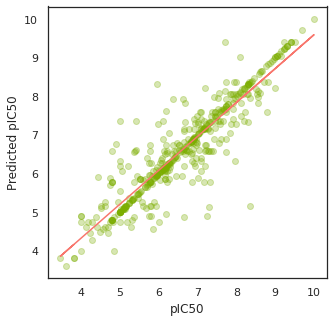

In [ ]:
# Plot of predicted vs actual
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,5))
plt.scatter(x=Y, y=Y_train_pred3, c="#7CAE00", alpha=0.3)

# Add trendline
# https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs
z = np.polyfit(Y, Y_train_pred3, 1)
p = np.poly1d(z)

plt.plot(Y,p(Y),"#F8766D")
plt.ylabel('Predicted pIC50')
plt.xlabel('pIC50')

# Linear Regression

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
model4 = LinearRegression()
model4.fit(X_train, Y_train)

LinearRegression()

In [ ]:
Y_train_pred4 = model4.predict(X)
Y_test_pred4 = model4.predict(X_test)

In [ ]:
#train_r2
score = model4.score(X_train, Y_train)
score

0.9027545390443854

In [ ]:
#train_mse
from sklearn.metrics import mean_squared_error
mean_squared_error(Y, Y_train_pred4)

1.8384224110436677e+21

In [ ]:
#test_q2/external
from sklearn.metrics import r2_score
r2_score(Y_test, Y_test_pred4)

-5.943304934840632e+21

In [ ]:
#test_mse/external
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test, Y_test_pred4)

9.19211205521834e+21

In [ ]:
#10_fold_CV
import statistics
from sklearn.model_selection import cross_validate
scores = cross_validate(model4, X, Y, cv=10,
                     scoring=('r2', 'neg_mean_squared_error'),
                     return_train_score=True)
B=(scores['train_neg_mean_squared_error'])
B1 = statistics.mean(B)
print(B1)

C=(scores['train_r2'])
C1 = statistics.mean(C)
print(C1)

-0.19809118532951617
0.8817902543516565


In [ ]:
#y_scrambiling
import statistics
r2_train_list = []
for i in range(100):
  Y_train1 = Y_train.sample(frac=1, replace=False, random_state=i)
  model = LinearRegression()
  model.fit(X_train, Y_train1)
  Y_train_pred = model.predict(X_train)
  r2b = r2_score(Y_train1, Y_train_pred)
  r2_train_list.append(r2b)

A=(r2_train_list[:100])
A1 = statistics.mean(A)
print(A1)

0.6464603061823647


Text(0.5, 0, 'pIC50')

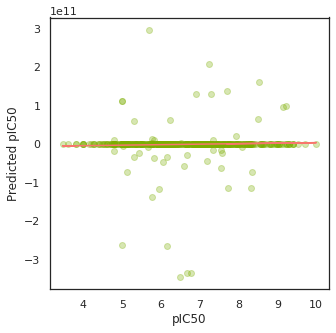

In [ ]:
# Plot of predicted vs actual
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,5))
plt.scatter(x=Y, y=Y_train_pred4, c="#7CAE00", alpha=0.3)

# Add trendline
# https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs
z = np.polyfit(Y, Y_train_pred4, 1)
p = np.poly1d(z)

plt.plot(Y,p(Y),"#F8766D")
plt.ylabel('Predicted pIC50')
plt.xlabel('pIC50')